# PHYSICS 260: Python Final Project

#### NAME: Varshney Kasthuri Rangan
#### UMID: 33075070

### ABSTRACT

The topic of this project is the cyclotron. The motivating question was:

_"How can we apply the working principle of a cyclotron in practice computationally, given a set of initial conditions for the experiment? By using an electron as our charged particle, what kind of data do we obtain about the electron's motion in a cyclotron when our chosen computational model is applied to this situation, and does this data correspond with the theoretical model of an electron's motion in a cyclotron?"_

In this project, I aimed to understand how to properly apply the theoretical principles of a cyclotron in a computational manner, by uand then used qualitative graph analysis to determine whether my chosen model matched the actual working of a cyclotron. 

The model which I used (described below in Setup, Code and Results) turned to be quite accurate with respect to the actual working of a cyclotron, and this was supported by the various plots I obtained of the position and the velocity of the electron while it exhibited motion (as explained in Final Conclusions). 

### TOPIC INTRODUCTION

A cyclotron is a type of particle accelerator that accelerates charged particles initially present at its center in a spiral path. It does this by providing a region of crossed electric and magnetic fields for the charged particle to move in under the influence of the resultant Lorentz force from the fields. The magnetic field is usually kept static by means of an electromagnet, and the electric field is rapidly varied by maintaining a radio frequency of the field's oscillation. <sup>[1] </sup>

For the first half of the 20th century, cyclotrons were the premier form of particle accelerator available for high-energy physics research, and are still popular for this use till today. They are also used in medicine, both in research and in practice, as studies have shown that radiotherapy can be used to treat certain types of cancer. <sup>[2] </sup>

A typical cyclotron schematic is shown below:

![Cyclotron Schematic](https://images.app.goo.gl/CpeSWT5SibPByqEYA)

Cyclotrons were first theorized and patented in 1929 by Hungarian physicist Léo Szilard, and the first major construction of a cyclotron was completed in 1932, performed by E. Lawrence and his team of graduate students at the University of California, Berkeley. He utilized large electromagnets obtained from obsolete radio transmitters owned by the Federal Telegraph Company. In 1939, Lawrence received the Nobel Prize in Physics. <sup>[3] </sup>

A picture of E. Lawrence's cyclotron from 1939 is shown below:

![Lawrence's Cyclotron, c. 1939](https://en.wikipedia.org/wiki/Cyclotron#/media/File:Cyclotron_with_glowing_beam.jpg)

Thus, cyclotrons have had a profound impact on science, due to their versatile uses in medicine and physics, and they paved they for future advancements in future experimental particle physics technology. Hence, they remain important to this very day, and that is why I have chosen to study them in this project.

### WORKING PRINCIPLE OF A CYCLOTRON

A cyclotron consists of two semicircular 'dees' with a rapidly varying radio frequency (RF) voltage applied in the region between them, placed in the region of a large electromagnet that provides a constant electric field that is perpendicular to the electric field. Charged particles at the center of the cyclotron get accelerated by the electric field and are set into circular motion by means of the magnetic force acting on them. The cyclotron frequency determines when the electric field switches direction so that the particles obtain maximum acceleration in the region between the dees. The cross-sectional view of the above schematic picture appropriately represents the various components of the cyclotron. 

Now, we want to find an expression for the cyclotron frequency, so that we may apply it later in our code. Suppose a charged particle in the cyclotron has mass m and charge q, and the magnitude of the magnetic field is B. Then, the magnetic force that causes the particle's circular motion satisfies the centripetal force acting on the particle, so that the only accelerating force on the particle is due to the electric field.

So, $$|\vec{F_{\text{mag}}}| = |\vec{F_c}|$$ So, $$qvB = \frac{mv^2}{r}$$ So, $$r = \frac{mv}{qB}$$

Now, the time period of the oscillating electric field should match the time period of the particle's motion, so $$T_{\text{elec}} = \frac{2\pi r}{v} = \frac{2\pi m}{qB}$$ So, $$\omega_{\text{cyc}} = \frac{2 \pi}{T} = \frac{qB}{m} \text{(1)}$$

This is our required cyclotron frequency.

### SETUP, CODE AND RESULTS

Now, we will model the project. 

We shall model the cyclotron as usual - two semicircular 'dees' in the XY-plane with a narrow gap between them, along with crossed electric and magnetic fields. The electric field will sinusoidally vary with time while the magnetic field will remain constant.

The first step is to import the required libraries.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We shall define some physical constants that we will need in this project, such as mass and charge of an electron. The accelerating voltage (V) between the semicircular dees shall be 50 V, the separation between them (d) shall be 100 micrometers, and the radius of each dee (r_cyc) will be 5 cm. The maximum amplitude of electric field (E_0) will be defined using V and d, and the constant magnetic field (B) shall be taken as 2 T in the +y direction.

In [70]:
q = -1 #electron charge, taken as -1 for purposes of code execution

m = 1 #electron mass, taken as 1 for the purposes of code execution

V = 50000 #voltage between dees is 50 V, here it is scaled by a factor of 1000 
          #for the purposes of proper code execution
    
d = 1e-5 #separation between the dees

E_0 = V/d #maximum amplitude of varying electric field depends on V and d

B = np.array([0,2,0]) #constant magnetic field in +y direction

r_cyc = 0.05 #radius of cyclotron

Next, we shall calculate the cyclotron angular frequency, $\omega_{\text{cyc}}$, using equation (...) as given in the theory section above. 

In [71]:
w_cyc = q * np.linalg.norm(B) / m

We define our timesteps array now, and then define a placeholder array function that utilizes our timesteps array definition in order for us to later define our electron position and velocity arrays. Our position and velocity arrays will be 3D arrays, while our timesteps array will be a 1D array, in accordance with the physical quantities themselves. For the purposes of code execution, we shall observe our electron's motion for 50 seconds.

In [72]:
timesteps = np.arange(0,50,0.001)

def placeholder_array_function(array):
    return np.zeros((array.size,3))

Now, we will define a general function that calculates the position and velocity of the electron at the various increments present in the timesteps array, while the electron is in the cyclotron. 

The input arguments of the function are a frequency function to calculate angular frequency, an array of timesteps, and the electron's initial position and velocity.

In [105]:
def calculate_position_and_velocity(frequency_function, timesteps_array, init_e_position, init_e_velocity):
    
    #Step 1: Define position and velocity arrays
    position_array = placeholder_array_function(timesteps_array)
    velocity_array = placeholder_array_function(timesteps_array)
    
    #Step 2: Assign the timestep increment to an array for position and velocity calculations
    dt = timesteps[1]
    
    #Step 3: Populating the position and velocity arrays with appropriate values
    for i, time in enumerate(timesteps_array):
        
        if i==0: #initial position and velocity valuesa are copied into position and velocity arrays
            position_array[i] = init_e_position
            velocity_array[i] = init_e_velocity
            
        else:
            
            w = frequency_function(w_cyc) #angular frequency is found
            t = timesteps_array[i]
            E = np.array([E_0*np.cos(w*t),0,0]) #electric field is found using angular frequency
            
            if np.abs(position_array[i-1,0] < d/2): #both electric and magenetic force are present when the electron is 
                                               #present between the dees, else only magnetic force is present
                F_electric = q * E
            else:
                F_electric = 0
            
            F_magnetic = q * np.cross(velocity_array[i-1],B)
            F_net = F_electric + F_magnetic 
            
            acceleration = F_net / m #finding acceleration
            
            velocity_array[i] = velocity_array[i-1] + acceleration*dt #finding and copying the new value of position 
                                                                #into position array
                
            position_array[i] = position_array[i-1] + velocity_array[i]*dt #finding and copying the new value of velocity 
                                                               #into velocity array
    
    #Step 4: Returning the position and velocity arrays
    return position_array, velocity_array        

Now, we shall define a function that returns the constant cyclotron frequency, and this will be passed as one of the arguments in the function **calculate_position_and_velocity** we just defined above when we call it later in the code.

In [106]:
def constant_frequency(w_cyc):
    return w_cyc

We shall now define an initial position and velocity for the electron, and then call the function **calculate_position_and_velocity** in order to obtain the required position and velocity arrays. The electron will have an initial velocity of 1 m/s in the z-direction, and will begin its trajectory at the origin.

In [127]:
initial_position = np.array([0,0,0])
initial_velocity = np.array([0,0,1])

position_values, velocity_values = calculate_position_and_velocity(constant_frequency, timesteps, initial_position, 
                                                                   initial_velocity)

We shall now convert the data obtained in these arrays into plots, in order to analyze them.

First, we plot the position of the electron in 3 spatial dimensions using three different plots: one showing the XY-plane, one showing the XZ-plane, and one showing a slanted top view.

Text(0.5, 0, 'z')

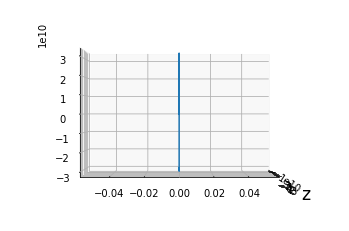

In [139]:
#XY-plane plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(0,0)
ax.plot(position_values[:,0], position_values[:,1], position_values[:,2])
ax.set_xlabel('x',fontsize='xx-large')
ax.set_xlabel('y',fontsize='xx-large')
ax.set_xlabel('z',fontsize='xx-large')

Text(0.5, 0, 'z')

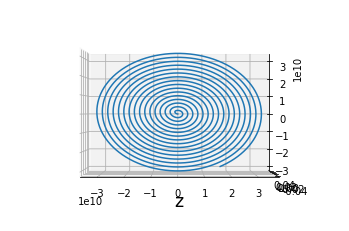

In [147]:
#XZ-plane plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(0,-90)
ax.plot(position_values[:,0], position_values[:,1], position_values[:,2])
ax.set_xlabel('x',fontsize='xx-large')
ax.set_xlabel('y',fontsize='xx-large')
ax.set_xlabel('z',fontsize='xx-large')

Text(0.5, 0, 'z')

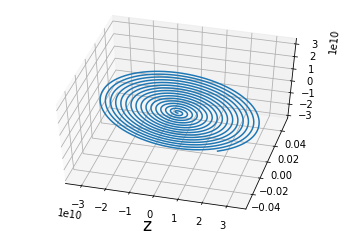

In [145]:
#slanted top view
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(50,-75)
ax.plot(position_values[:,0], position_values[:,1], position_values[:,2])
ax.set_xlabel('x',fontsize='xx-large')
ax.set_xlabel('y',fontsize='xx-large')
ax.set_xlabel('z',fontsize='xx-large')

From these plots, it is clear that the electron is continually orbiting in the XZ plane (shown by the first plot), and the electron does not exhibit motion in the y-direction (shown by the second plot). Thus, the electron's motion in a cyclotron has been successfully modeled. 

To support the conclusion that we have successfully modeled the electron's motion in a cyclotron with the given conditions, we shall provide plots showing x-position vs. y-position, magnitude of velocity vs. time, and magnitude of kinetic energy vs. time.

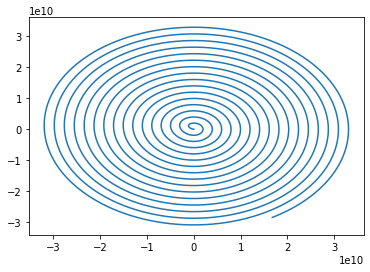

In [150]:
#x-position vs. z-position plot
plt.figure()
plt.plot(position_values[:,0],position_values[:,2])

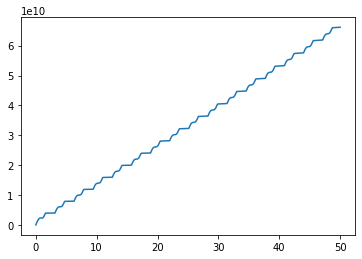

In [171]:
#magnitude of velocity vs. time plot
def mag(array):
    mag = np.sqrt(array[:,0]**2 + array[:,1]**2 + array[:,2]**2)
    return mag
mag_velocity = mag(velocity_values)
plt.plot(timesteps, mag_velocity)

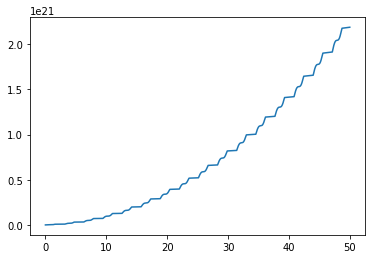

In [172]:
#magnitude of kinetic energy vs. time plot
KE = 0.5 * m * mag_velocity**2
plt.plot(timesteps, KE)

We observe that in the velocity plot, the graph remains constant at certian times when the electron is in the region of either dee, therefore it experiences no electric force and hence no increase in velocity. At other times, the graph is increasing, as the electron is in bteween the dees during that time interval, and hence experiences an electric force that accelerates it to increase its velocity. This phenomenon corresponds with the plot of the kinetic energy as well, as we observe similar regions of increase and regions of constancy in the kinetic energy plot.

### FINAL CONCLUSIONS

1. We conclude that it is possible to computationally model the electron's motion in a cyclotron, given the electron's initial position and velocity, and a pre-defined electric and magnetic field. This can be done by finding an appropriate value of angular frequency for which the electric field can maximally accelerate the electron while moves in the cyclotron, and then using the regular Euler method to find the velocity and the position of the electron at various timesteps.


2. In our particular simulation, the electron had an initial position at the origin and an initial velocity of $$v = 1 \text{ m/s}$$ in the +z direction, while the cyclotron produced a magnetic field of $$B = 2 \, \text{T}$$ in the +y direction and a sinusoidally varying electric field $$E = E_0 \, \text{cos}(\omega_{\text{cyc}}t)$$ in the +x-direction, with a maximum amplitude of $$E_0 =5 \text{ V/m}$$ 

    The application of the model above resulted in obtaining the motion of the electron to be entirely in the XZ-plane as shown in the plots above, with the position or velocity vectors having zero value in the y-direction at any time. 
    
    From this, we conclude that in a cyclotron that if the initial velocity of the electron is projected in a region of crossed electric and magnetic fields such that the velocity vector is itself oriented perpendicular to both of the fields, the electron will exhibit planar motion continually, under the considerations of Newtonian mechanics. This corresponds to the working principle of a cyclotron, hence our chosen computational model for the cyclotron is accurate on the count of properly modeling the position of the electron in a cyclotron.


3. Further, as demonstrated in the plots of velocity and kinetic energy vs. time, in our simulation the electron experiences an increase in velocity when it is between the two dees in our model, as there is a varying electric field in this region given above in the code of **calculate_position_and_velocity**. This corresponds with the actual phenomenon of electron acceleration in a real cyclotron, so again, our chosen computational model for the cyclotron is accurate on the count of properly modeling the velocity of the electron in a cyclotron.